**Review**
  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall! The EDA looks great, as well as the modeling section, but there are some problems with how you treated the test set. It should be pretty straightforward to fix though!

# Taxi orders prediction using Machine Learning

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

# Goal of the project

- The main goal of this project is to build a model for the amount of taxi orders prediction.

# Table of Content

<div> 
    <ol>
      <li><a href="#1"> Data downloading</a></li>
      <li><a href="#2"> Data preparation</a></li>
      <li><a href="#3">Model analysis</a></li> 
      <li><a href="#4">Model training</a></li>
      <li><a href="#5">Model testing</a></li>
      <li><a href="#6">Overall Conclusion</a></li>
    </ol> 
</div>

# <a id="1"> Data Loading

In [1]:
#Import all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import time
import seaborn as sns   #visualization

sns.set(style="ticks", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

import xgboost as xgb 
from lightgbm import LGBMRegressor
RMSE_THRESHOLD=48
import sys
print (sys.version)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

print('Libraries imported succesfully')

3.7.8 | packaged by conda-forge | (default, Nov 17 2020, 23:45:15) 
[GCC 7.5.0]
Libraries imported succesfully


In [2]:
 data = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv')

In [3]:
# function to determine if columns in file have null values
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [4]:
# study the general information about the dataset 
print('General information about the dataframe')
get_info(data)

General information about the dataframe
----------------------------------------------------------------------------------------------------
Head:



,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
datetime      26496 non-null object
num_orders    26496 non-null int64
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


----------------------------------------------------------------------------------------------------


,datetime
count,26496
unique,26496
top,2018-05-10 10:10:00
freq,1



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(26496, 2)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




**Conclusion**
- Our data contains 26496 rows & 2 columns.
- `datetime` is an object column and must be changed to datetime64
- the dataset doesn't contain any missing or duplicated values.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>

# <a id="2"> Data Preparation

In [5]:
data['datetime'] = data['datetime'].astype('datetime64')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
datetime      26496 non-null datetime64[ns]
num_orders    26496 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


In [7]:
data.set_index('datetime', inplace=True)

- With `is_monotonic` attribute, if the order is chronological, the attribute will return True; if not, False

In [8]:
data.index.is_monotonic

True

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, it's important to check that the order is correct, otherwise the data from the future might get into the train set and that is a big problem

</div>

In [9]:
data.index

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 00:10:00',
               '2018-03-01 00:20:00', '2018-03-01 00:30:00',
               '2018-03-01 00:40:00', '2018-03-01 00:50:00',
               '2018-03-01 01:00:00', '2018-03-01 01:10:00',
               '2018-03-01 01:20:00', '2018-03-01 01:30:00',
               ...
               '2018-08-31 22:20:00', '2018-08-31 22:30:00',
               '2018-08-31 22:40:00', '2018-08-31 22:50:00',
               '2018-08-31 23:00:00', '2018-08-31 23:10:00',
               '2018-08-31 23:20:00', '2018-08-31 23:30:00',
               '2018-08-31 23:40:00', '2018-08-31 23:50:00'],
              dtype='datetime64[ns]', name='datetime', length=26496, freq=None)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
num_orders    26496 non-null int64
dtypes: int64(1)
memory usage: 414.0 KB


- Plot the time series graph.

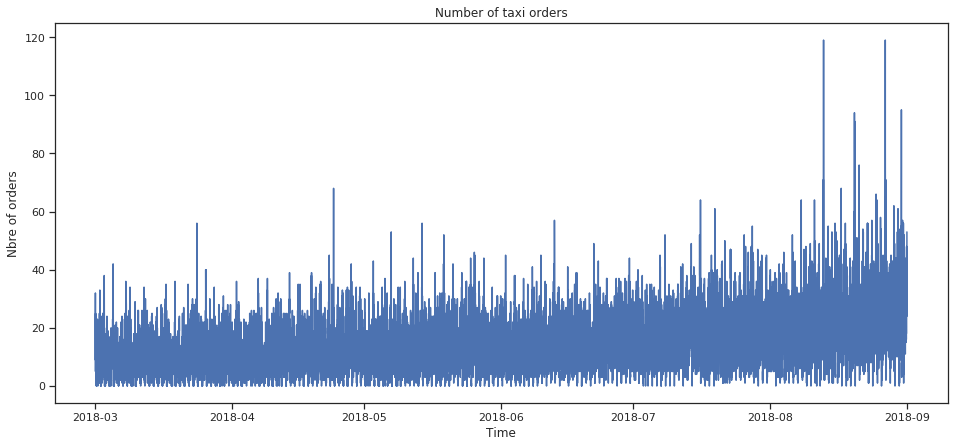

In [11]:
plt.figure(figsize=(16,7))
plt.title('Number of taxi orders')
plt.xlabel('Time')
plt.ylabel('Nbre of orders')
plt.plot(data['num_orders']);

**Conclusion**
- We've changed the `datetime` type from object to datetime64
- we've set `datetime` as the dataframe index
- and checked whether the order of the data is chronological or not with the `is_monotonic` attribute
- and finaly visualzed the time series data

<div class="alert alert-success">
<b>Reviewer's comment</b>

Awesome, you visualized the time series!

</div>

# <a id="3"> Model Analysis

## Resampling

- The time series data is already grouped for each 10 minutes
- We are ressampling the data by 1 hour & calculating the sum of the grouped values for each hour

In [12]:
data = data.resample('1H').sum()
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


<div class="alert alert-success">
<b>Reviewer's comment</b>

Resampling is done correctly

</div>

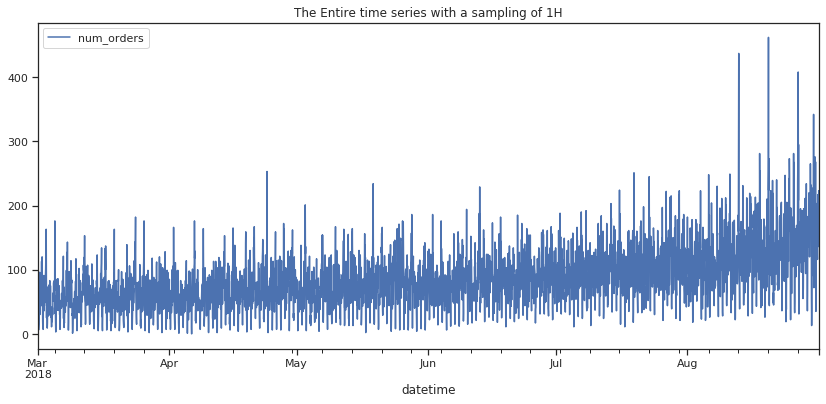

In [13]:
data.plot(figsize=(14,6),title='The Entire time series with a sampling of 1H');

- We see a positive trend from March to the end of September.
- Here we can see that the timeseries are not stationary since its values are growing.


<div class="alert alert-success">
<b>Reviewer's comment</b>

Yep, you are absolutely right!

</div>

- Select the 2 weeks time period for data ressampling.

In [14]:
week_sampling = data['2018-03-01':'2018-03-14']
day_simpling = data['2018-03-01']

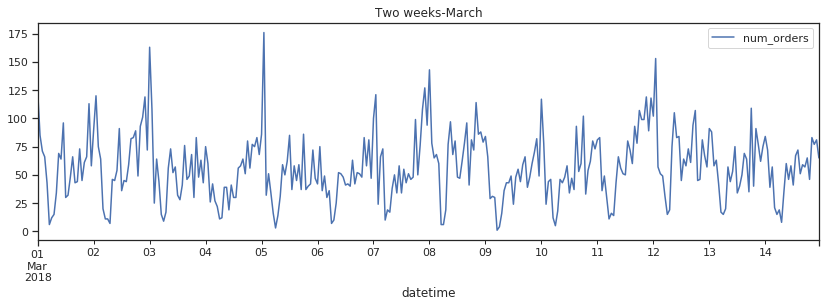

In [15]:
week_sampling.plot(figsize=(14,4),title='Two weeks-March');

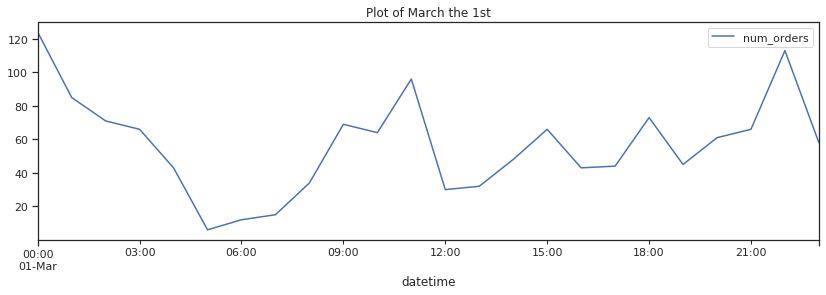

In [16]:
day_simpling.plot(figsize=(14,4),title='Plot of March the 1st');

- It's hard to make analysis with those fluctuations, let's remove them.

## Rolling Mean

To reduce the fluctuations in our time series, we are using the rolling mean helping for data smoothing.
- The method involves finding the values least susceptible to fluctuations, that is, the arithmetic mean.

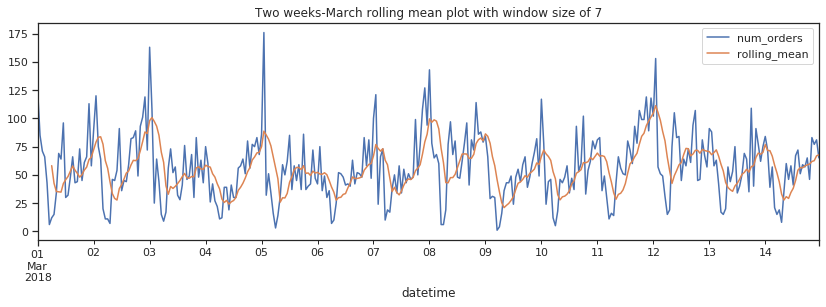

In [17]:
#using a window size of 7
week_sampling['rolling_mean'] = week_sampling.rolling(7).mean() 
week_sampling.plot(figsize=(14,4),title='Two weeks-March rolling mean plot with window size of 7');

- Find the rolling standard deviation (rolling std)

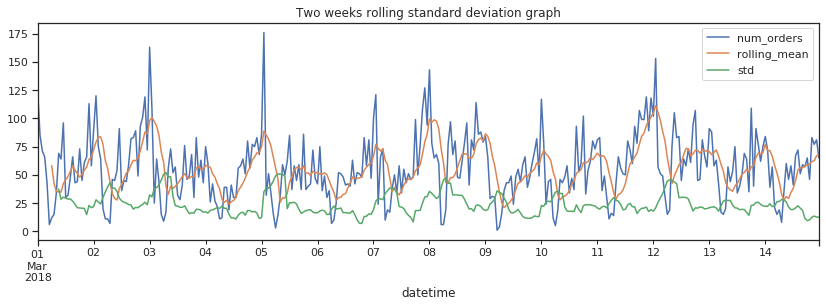

In [18]:
week_sampling['std'] = week_sampling['num_orders'].rolling(10).std() 
week_sampling.plot(figsize=(14,4),title='Two weeks rolling standard deviation graph');

- It seems that the data still has consistent fluctuations

## Daily / Weekend's taxi orders

In [19]:
data1hour_day = week_sampling['2018-03-01']
data2hour_day =  week_sampling['2018-03-02']
data1hour_saturday = week_sampling[week_sampling.index.weekday==5].head(24)
data2hour_saturday = week_sampling[week_sampling.index.weekday==5].tail(24)
data1hour_sunday = week_sampling['2018-03-04']
data2hour_sunday = week_sampling['2018-03-11']

## Visualizing

**2 consecutive Days**


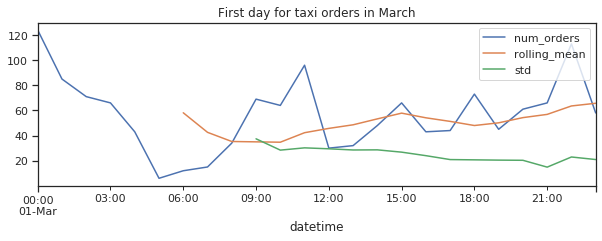

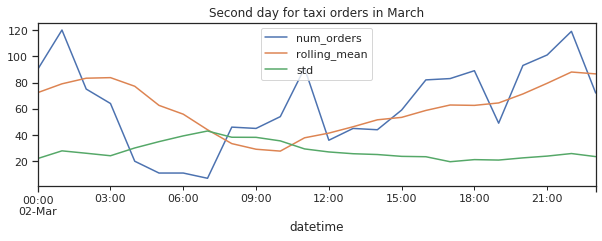

In [20]:
data1hour_day.plot(figsize=(10,3),title='First day for taxi orders in March')
data2hour_day.plot(figsize=(10,3),title='Second day for taxi orders in March');

**2 consecutive Saturdays**


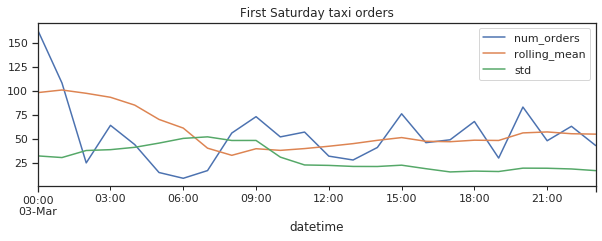

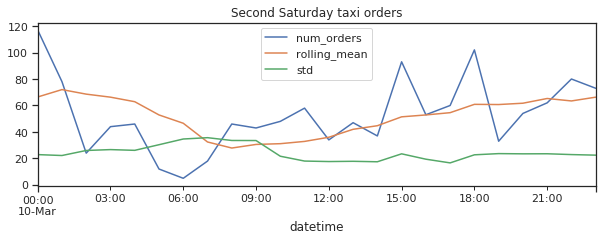

In [21]:
data1hour_saturday.plot(figsize=(10,3),title='First Saturday taxi orders')
data2hour_saturday.plot(figsize=(10,3),title='Second Saturday taxi orders');

**2 consecutive Sundays**

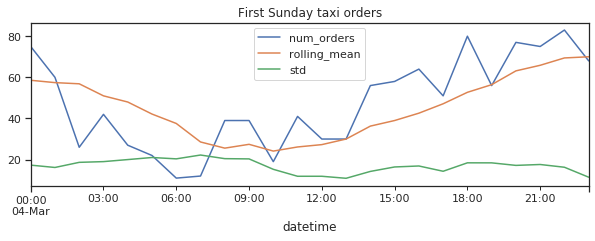

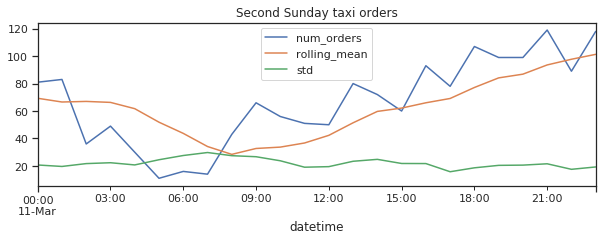

In [22]:
data1hour_sunday.plot(figsize=(10,3),title='First Sunday taxi orders')
data2hour_sunday.plot(figsize=(10,3),title='Second Sunday taxi orders');

**Conclusion**

From those plots we can say:
- No matter what day it is, it is clear that the orders are remarkably fewer aroud 6/7am. The curve starts to increase slowly from 9/10am. And increase higher from around 6pm.
- Possibly due to the fact that many are going to work at 9am and coming back at 6pm, the increase after 9pm is probably due to the parties and dinners etc. 
- Let's check trends and seasonality to dig more into this.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you dug deeper into the data and made some interesting observations!

</div>

## Trends / Seasonality

- A *Trend* is a smooth change of the mean value of the series without repeating patterns. For example, annual increase in taxi rides.
- *Seasonality* means cyclically repeating patterns in a time series. For instance, the growth of increase in taxi rides on weekdays.
- We Decompose the time series data into Trend /Seasonal /Residual components.

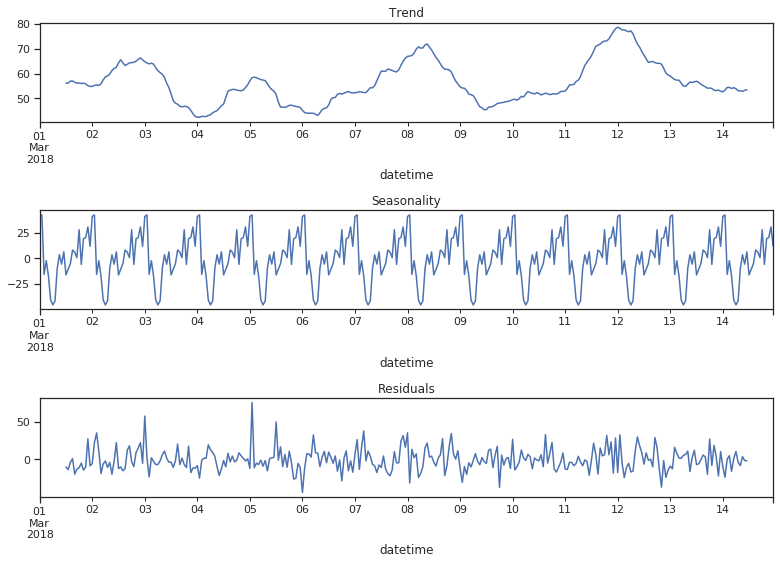

In [23]:
decomposed = seasonal_decompose(week_sampling['num_orders'].dropna())

plt.figure(figsize=(11, 8))
# plt.subplot(311) says 3 rows, 1 column, first image. 
plt.subplot(311)

# To display the graph correctly, specify its axes ax equal to plt.gca() (gca = get current axis)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout() # this helps fit subplots into the area 

## Seasonality / 2 week-days and a week-end

In [24]:
tmp = week_sampling['2018-03-04':'2018-03-05']

In [25]:
decomposed = seasonal_decompose(tmp['num_orders'].dropna())

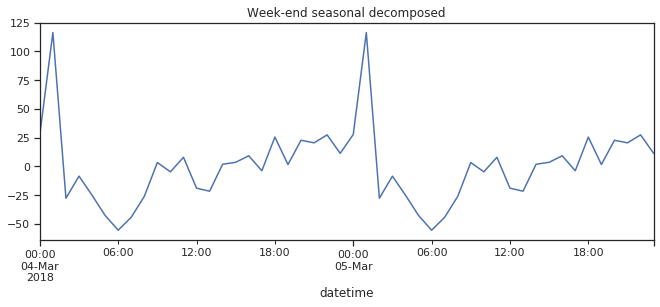

In [26]:
decomposed.seasonal.plot(figsize=(11,4),title='Week-end seasonal decomposed');

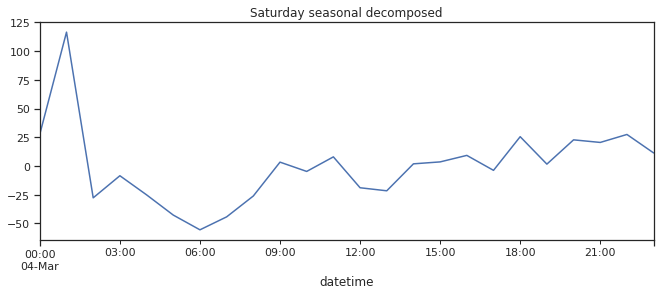

In [27]:
decomposed.seasonal['2018-03-04'].plot(figsize=(11,4),title='Saturday seasonal decomposed');

**Conclusion**

- Whether it is for week-days or week-end:
  - the seasonality visualization looks similar.
  - taxi rides start decreasing remarkably after midnight and increasing from 6am.
  - there is 2 peaks: 
    - around noon
    - before midnight.


<div class="alert alert-warning">
<b>Reviewer's comment</b>

Awesome, you checked the seasonal decomposition! I would suggest first getting a decomposition, and then taking a small slice of it for closer inspection, rather than doing a decomposition of a small slice of data

</div>

<div class="alert alert-info">
  Yes, thank you!
</div>

## Checking whether the resampled time series are stationary or not 

- Stationary series can help forecast data. 
- We will use Time Series Difference by shifting the data, computing the difference, and visualizing



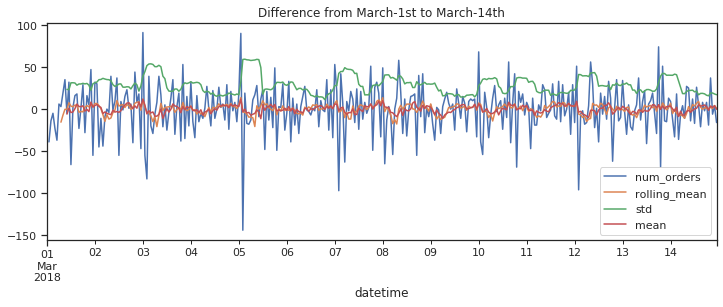

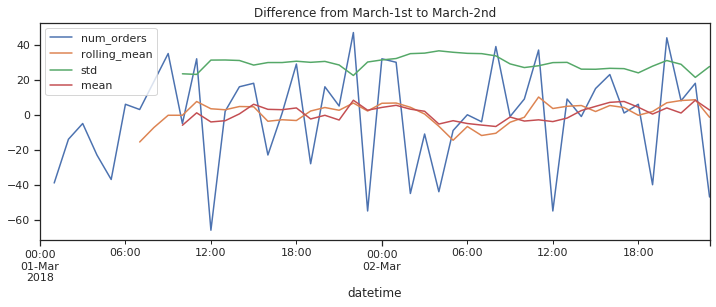

In [28]:
data_diff_w = week_sampling - week_sampling.shift()
data_diff_w['mean'] = data_diff_w['num_orders'].rolling(10).mean()
data_diff_w['std'] = data_diff_w['num_orders'].rolling(10).std()
data_diff_d = data_diff_w['2018-03-01':'2018-03-02']
data_diff_w.plot(figsize=(12,4),title = 'Difference from March-1st to March-14th')
data_diff_d.plot(figsize=(12,4),title = 'Difference from March-1st to March-2nd');

- We've previously seen that the timeseries(the whole dataset) are non-stationary
- when resampling, we've resulted with stationary series, since the the mean and standard deviation are not remarkebly changing. 
- The data can be forecasted now.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

If we look at the whole dataset's plot (which you did at first) rather than the last two weeks, it's clear that the series is non-stationary

</div>

# <a id="4"> Model Training

## Forecast Accuracy

- The point of time series forecasting is developing a model which predicts the future values of a time series based on previous data.
- We will evaluate the model using the previous value in the series, predict the hourly taxi orders and find the RMSE value.

In [29]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
print("Median hourly taxi orders:", test['num_orders'].median())

num = train.iloc[len(train)-1]['num_orders']

pred_previous = test.shift(fill_value=num)

# root-mean-square error
rmse = np.sqrt(mean_squared_error(test['num_orders'],pred_previous))
print("rmse",rmse)

Median hourly taxi orders: 135.0
rmse 58.856486242815066


- with this forecast, the model is sanity checked which serves as a useful benchmark. 
- let's move to the training to get better predictions/better rmse score.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train and test without shuffling, great! Previous value is indeed a good baseline!

</div>

## Creating Features

In [30]:
#add features and lags
def make_features(data, max_lag, rolling_mean_size):
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    for lag in range(1,max_lag+1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

In [31]:
data = pd.DataFrame(data)

In [32]:
make_features(data,6,7)

In [33]:
data.head()

,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,1,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN


- we need to drop nas

In [34]:
data = data.dropna()

In [35]:
print('The time series has', data.shape[0], 'rows and', data.shape[1], 'features')

The time series has 4409 rows and 12 features


In [36]:
data.head()

,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-03-01 07:00:00,15,3,1,3,7,12.0,6.0,43.0,66.0,71.0,85.0,58.142857
2018-03-01 08:00:00,34,3,1,3,8,15.0,12.0,6.0,43.0,66.0,71.0,42.571429
2018-03-01 09:00:00,69,3,1,3,9,34.0,15.0,12.0,6.0,43.0,66.0,35.285714
2018-03-01 10:00:00,64,3,1,3,10,69.0,34.0,15.0,12.0,6.0,43.0,35.000000
2018-03-01 11:00:00,96,3,1,3,11,64.0,69.0,34.0,15.0,12.0,6.0,34.714286


## Training

In [37]:
#Define a function for RMSE scoring
def rmse_scorer(true,pred):
    return mean_squared_error(true,pred)**0.5

In [38]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())
#shape of train set
print('The train set has', train.shape[0],'rows and',train.shape[1],'features')
#shape of test set
print('The test set has', test.shape[0], 'rows and',test.shape[1],'features')

2018-03-01 07:00:00 2018-08-13 14:00:00
2018-08-13 15:00:00 2018-08-31 23:00:00
The train set has 3968 rows and 12 features
The test set has 441 rows and 12 features


- Declaring Features

In [39]:
#defining target and features/train
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

In [40]:
#defining target and features/test
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

For training part, we are going to use the following algorithms:
- LinearRegression
- RandomForestRegressor
- XGBRegressor
- LGBMRegressor

- Now we will use time series split to tune hyperparams for cv

In [41]:
datacv = TimeSeriesSplit(n_splits=5)

In [42]:
print(datacv)

TimeSeriesSplit(max_train_size=None, n_splits=5)


### Linear Regression

In [43]:
#train a linear regression model
def train_linear_model(X_train, y_train):
    global linear_model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

In [44]:
#linear regression model prediction
def linear_regressor_prediction(X_test, y_test):
    linear_pred = linear_model.predict(X_test)
    #rmse
    linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
    print('RMSE using Linear Regression \n')
    print('RMSE: {:.3f}'.format(linear_rmse))
    print()

In [45]:
%%time
train_linear_model(features_train, target_train)

CPU times: user 5.47 ms, sys: 476 µs, total: 5.95 ms
Wall time: 41.4 ms


### Random Forest Regressor

In [46]:
%%time
#hyperparams tuning
grid = {
    "n_estimators" : [10, 25, 50], 
    "max_depth" : [None, 2, 4, 8],
    "min_samples_leaf" : [2, 4, 6]
}
#model definition
rf_regressor = RandomForestRegressor(random_state = 12345)
#grid_search
grid_search_rf = GridSearchCV(estimator = rf_regressor, param_grid = grid, scoring='neg_mean_squared_error', cv =datacv)

grid_search_rf.fit(features_train, target_train)

print('hyperparams are {}'.format(grid_search_rf.best_params_))

hyperparams are {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 50}
CPU times: user 34.7 s, sys: 150 ms, total: 34.9 s
Wall time: 35 s


- Random Forest training:

In [47]:
def train_rf(X_train, y_train):
    global rf_model
    
    rf_model = RandomForestRegressor(**grid_search_rf.best_params_)
    #model training
    rf_model.fit(X_train, y_train)

def rf_regressor_prediction(X_test, y_test):
    rf_pred = rf_model.predict(X_test)
    rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
    print('RMSE for Random Forest Regressor \n')
    print('RMSE: {:.3f} \n'.format(rf_rmse))

In [48]:
%%time
train_rf(features_train, target_train)

CPU times: user 1.11 s, sys: 12 ms, total: 1.12 s
Wall time: 1.13 s


### XGBoost Regressor

In [49]:
%%time
# hyperparameter optimization for XGBoost

# define hyperparameters to tune
xgb_grid = {'learning_rate': [0.001, 0.01, 0.1, 0.3], 
            'max_depth': [2, 4, 6, 10],
            'n_estimators': [50]
           }
# define the model 
xgb_regr = XGBRegressor(objective ='reg:squarederror',random_state = 12345)

# define the grid search
grid_search_xgb = GridSearchCV(
    estimator = xgb_regr, 
    param_grid = xgb_grid, 
    scoring = "neg_mean_squared_error", 
    cv = datacv, 
    n_jobs = 1
)
# execute search
grid_search_xgb.fit(features_train, target_train)
# summarize result
print('The best hyperparameters are: {}'.format(grid_search_xgb.best_params_))

The best hyperparameters are: {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 50}
CPU times: user 13.3 s, sys: 111 ms, total: 13.4 s
Wall time: 13.5 s


- XGBoost training:

In [50]:
def train_xgboost_regressor(X_train, y_train):
    global xgb_model
    #model building
    xgb_model = XGBRegressor(**grid_search_xgb.best_params_, objective='reg:squarederror')
    xgb_model.fit(X_train, y_train)
    
def xgb_regressor_prediction(X_test, y_test):
    xgb_pred = xgb_model.predict(X_test)
    xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
    
    print('RMSE with XGBoost Rgressor \n')
    print('RMSE: {:.3f}'.format(xgb_rmse))

In [51]:
%%time
train_xgboost_regressor(features_train, target_train)

CPU times: user 197 ms, sys: 0 ns, total: 197 ms
Wall time: 200 ms


### LightGBM Regressor

In [52]:
%%time

#hyperparams tuning
lgbm_grid = {
    'learning_rate' : [0.001, 0.01, 0.1],
    'n_estimators' : [50],
    'num_leaves' : [5, 8, 10]
}

#model definition
lgbm_regressor = LGBMRegressor(random_state = 12345)

#grid_search
grid_search_lgbm = GridSearchCV(
    estimator = lgbm_regressor, 
    param_grid = lgbm_grid,
    scoring = 'neg_mean_squared_error',
    cv = datacv,
    n_jobs = 1
)

grid_search_lgbm.fit(features_train, target_train)

print('The best hyperparameters are: {}'.format(grid_search_lgbm.best_params_))


The best hyperparameters are: {'learning_rate': 0.1, 'n_estimators': 50, 'num_leaves': 10}
CPU times: user 2.19 s, sys: 52 ms, total: 2.24 s
Wall time: 2.26 s


- LGBM training:

In [53]:
def train_lgbm_regressor(X_train, y_train):
    global lgbm_model
    lgbm_model = LGBMRegressor(**grid_search_lgbm.best_params_)
    lgbm_model.fit(X_train, y_train)
    
def lgbm_regressor_prediction(X_test, y_test):
    lgbm_pred = lgbm_model.predict(X_test)
    
    lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_pred))
    
    print('RMSE using LGBM Regressor \n')
    print('RMSE: {:.3f}'.format(lgbm_rmse))

In [54]:
%%time
train_lgbm_regressor(features_train, target_train)

CPU times: user 60.9 ms, sys: 0 ns, total: 60.9 ms
Wall time: 59.7 ms


### Features importance

In [55]:
#model_names = ['RandomForestRegressor','XGBRegressor','LightGBMRegressor']
def features_importance_sorted(model, X_test, y_test):
    features_sorted = model.feature_importances_.argsort()
    plt.figure(figsize=(10,8))
    plt.barh(features_train.columns[features_sorted],
            model.feature_importances_[features_sorted],
            color = 'blue')
    plt.xlabel(type(model).__name__)

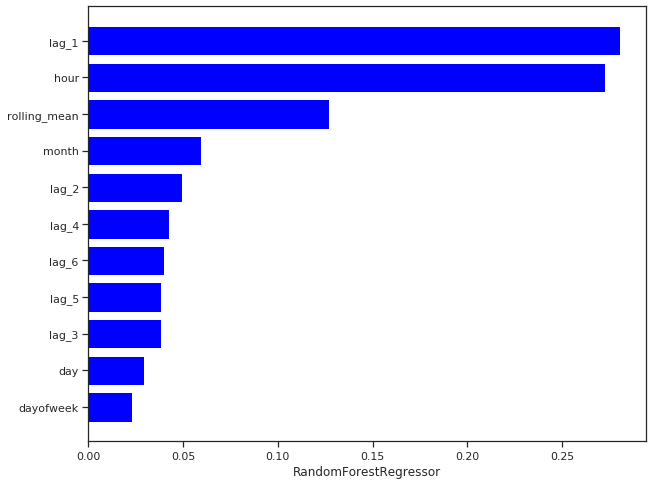

In [56]:
features_importance_sorted(rf_model, features_test, target_test)

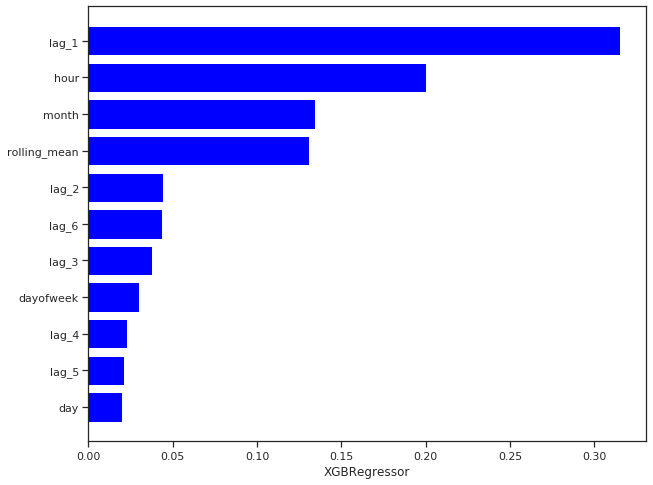

In [57]:
features_importance_sorted(xgb_model, features_test, target_test)

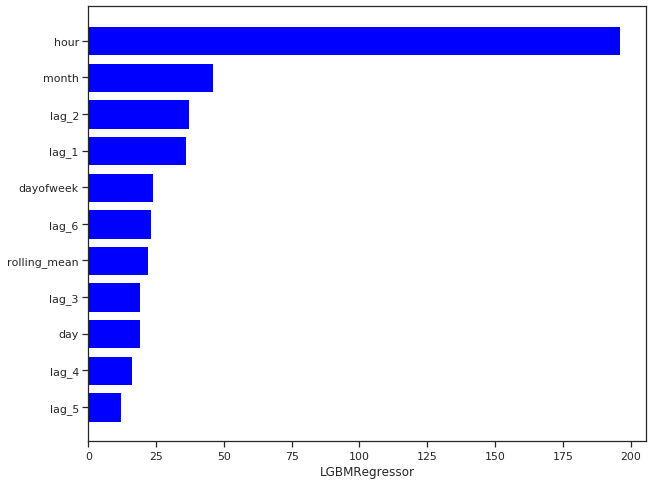

In [58]:
features_importance_sorted(lgbm_model, features_test, target_test)

# Model Analysis

- We are analyzing and assessing in this section the quality of the trained models. 
- Models' summary, RMSE, the time for hyperparameters tuning and model training

**And this is a summary of our results before testing**

|**Models**| **Time required to train model** | **RMSE score**  |
|---|---|---|
| Linear Regression	| 41.4 ms| 52.740 |
| Random Forest Regressor | 1.13 s | 45.055 |
| XGBoost Regressor | 200 ms | 45.944 |
| LightGBM Regressor | 59.7 ms | 47.278 |

**Conclusion**

- We trained Linear Regressor, Random Forest, XGBoost Regressor and LightGBM Regressor. 
- And we tuned the hyperparameters.
- From the results we've seen that:
    - Random forest and XGBoost both has an RMSE score of 45.xx which is the lowest compared to LGBM and Linear regression, but
    - XGBoost take less time in the training compared to Random forest.

# Model Testing

We will check prediction for: LinearRegression, RandomForestRegressor, XGBRegressor, LGBMRegressor

- Linear regression predictions

In [59]:
%%time
linear_regressor_prediction(features_test, target_test)

RMSE using Linear Regression 

RMSE: 52.740

CPU times: user 3.76 ms, sys: 0 ns, total: 3.76 ms
Wall time: 2.99 ms


- Random Forest predictions

In [60]:
%%time
#make prediction for test data
rf_regressor_prediction(features_test, target_test)

RMSE for Random Forest Regressor 

RMSE: 45.062 

CPU times: user 14 ms, sys: 41 µs, total: 14 ms
Wall time: 12.8 ms


- XGBoost Predictions

In [61]:
%%time
xgb_regressor_prediction(features_test, target_test)

RMSE with XGBoost Rgressor 

RMSE: 45.944
CPU times: user 5.35 ms, sys: 0 ns, total: 5.35 ms
Wall time: 3.92 ms


- LGBM predictions

In [62]:
%%time
lgbm_regressor_prediction(features_test, target_test)

RMSE using LGBM Regressor 

RMSE: 47.278
CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 9.66 ms


**Summary of our results after testing**

|**Models**| **Time required to train model**  | **Time required for model prediction** | **RMSE score**  |
|---|---|---|---|
| Linear Regression	| 3.4 ms | 2.68 ms | 52.740 |
| Random Forest Regressor | 1.13 s | 11.9 ms | 45.378 |
| XGBoost Regressor | 204 ms | 4.87 ms | 45.944 |
| LightGBM Regressor | 76.5 ms | 9.84 ms | 47.278 |

**Conclusion**

# Conclusion

- We will create features for a one-step forecast horizon.
- Let's start by adding Lag values, and rolling_mean to data

In [ ]:
#Create a dataframe to dataframe name, Model name and model results
column_names = ['Model','Lag','RollingWindowSize','RMSE_validation','HyperParams']
##Intitialize lists data. 
df_results = pd.DataFrame(columns = column_names)
display(df_results)

In [ ]:
#Define a function for RMSE scoring
def rmse_scorer(target: np.ndarray, predicted: np.ndarray):
    return np.sqrt(mean_squared_error(target, predicted))
      
rmse_scoring = make_scorer(rmse_scorer)

In [ ]:
def updateResults(model_name,lag,RollingWindowSize,rmseValid,HyperParams,df_results):

    resultRowStr= [model_name,lag,RollingWindowSize,rmseValid,HyperParams]
    rows = [pd.Series(resultRowStr, index=df_results.columns)]
    df_results=df_results.append(rows,ignore_index=True)#append rows
    
    return(df_results)#check the rows 


In [ ]:
def evaluateModel(model,features_train,target_train,features_trial,target_trial):
    model.fit(features_train, target_train)
    predicted_trial = model.predict(features_trial)
    rmseTrial = rmse_scorer(target_trial, predicted_trial) 
    return(rmseTrial)

In [ ]:
evaluationModels = [
                    LinearRegression(),
                    RandomForestRegressor(random_state=12345),
                    XGBRegressor(objective='reg:squarederror',random_state=12345),
                    LGBMRegressor(random_state=12345)
                    ]

evaluationModelNames = ['LinearRegression','RandomForestRegressor','XGBRegressor','LightGBMRegressor']
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['hour'] = data.index.hour
data['dayofweek'] = data.index.dayofweek

def make_lags(data, max_lag, rolling_mean_size):
    data1 = data.copy()   
    for lag in range(1, max_lag + 1):
        data1['lag_{}'.format(lag)] = data1['num_orders'].shift(lag)

    data1['rolling_mean'] = data1['num_orders'].shift().rolling(rolling_mean_size).mean()
    data1.dropna(inplace=True)
    return data1

def make_features(lag,rollingWindowSize):
    data1 = arrLags[rollingWindowSize][lag]
    features=data1.drop('num_orders',axis=1)
    target = data1['num_orders']
    return features,target

<div class="alert alert-success">
<b>Reviewer's comment</b>

You added calendar features, lag features and a shifted rolling mean. Very good!

</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Using implicit arguments from global variables is not a good idea. Try to make all arguments of your function explicit.

</div>

In [ ]:
#make a 2-dimensional array of the dataframes with different values of rollingWindowSize and lag.
# This is done to avoid repeating the make of dataframes for validation and test sets.
rows, cols = (5, 8) 
arrLags = [[data for i in range(cols)] for j in range(rows)] 
for rollingWindowSize in range(1,5):
    for lag in range(1,8):
            arrLags[rollingWindowSize][lag] = make_lags(data,lag,rollingWindowSize)

<div class="alert alert-danger">
<b>Reviewer's comment</b>

Test data was used before the final evalution

</div>

## Model Evaluation

Evaluation for:

- LinearRegression
- RandomForestRegressor
- XGBRegressor
- LGBMRegressor

In [ ]:
for rollingWindowSize in range(1,5):
    for lag in range(1,8):
            features,target = make_features(lag,rollingWindowSize)
            
            features_train, features_validtest, target_train, target_validtest = train_test_split(
                    features, target, test_size=0.2, shuffle=False,random_state=12345)

            features_valid, features_test, target_valid, target_test = train_test_split(
                    features_validtest, target_validtest, test_size=0.5, shuffle=False,random_state=12345)
            
            i=0
            for model in evaluationModels:
                modelName = evaluationModelNames[i]
                hyperParam=''
                rmseValid = evaluateModel(model,features_train, target_train,features_valid,target_valid)
                df_results = updateResults(modelName,lag,rollingWindowSize,rmseValid,"",df_results)
                i=i+1
                
    totsize = len(data)

print('***********')
print('training set  : {0:.0%}'.format(len(features_train) /totsize),features_train.shape, ', training target   :',target_train.shape)
print('valid set: {0:.0%}'.format(len(features_valid)/totsize),features_valid.shape,', valid target :',target_valid.shape)
print('test set: {0:.0%}'.format(len(features_test)/totsize),features_test.shape,', test target :',target_test.shape)
print('***********')
display(df_results)
print()

## Feature Validation

top 4 Best **RMSEs**

In [ ]:
result_1 = df_results.sort_values('RMSE_validation',ascending=True).head(4)
display(result_1)

**Conclusion**

we can see from the results that:
- LightGBMRegressor has the best RMSE
- XGBRegressor is also ammongst the best.

## Feature Validation

- We will list here models with best RMSEs

In [ ]:
result_2 = df_results.sort_values('RMSE_validation',ascending=True).groupby('Model').head(1)
result_3 = result_1.append(result_2).drop_duplicates(keep='first')
display(result_3)

**Conclusion**

From the evaluation of the 4 regression models, we conclude that:
- Three regression models resulted in RMSE between 31 and 32.xx. 
- The lag and RollingWindowSize are listed for each model.
- LR model had a higher RMSE on validation set.
- RMSE on validation set is lower than its required threshold (48).



## CROSS-VALIDATION

 Let's identify the best hyper-parameters for the following models to get better RMSE scores:

- LGBMRegressor
- XGBRegressor
- RandomForestRegressor

### LightGBMRegressor / GridSearchCV

In [ ]:
# Required since Timeseries dataset
ts_cv = model_selection.TimeSeriesSplit(2) 

features,target = make_features(7,3)

features_train, features_validtest, target_train, target_validtest = train_test_split(
           features, target, test_size=0.2, shuffle=False,random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
           features_validtest, target_validtest, test_size=0.5, shuffle=False,random_state=12345)
            
param_grid =  {
              'num_leaves' : [31,35,40], 
              'learning_rate' : [0.5,0.1],
              'n_estimators' : [150],
              'eval_metric':['RMSE'],
              'random_state' : [12345],
               'n_jobs':[-1],
              }

LGBM_model = model_selection.GridSearchCV(estimator=LGBMRegressor(), param_grid=param_grid, cv=ts_cv)
LGBM_model.fit(features_train, target_train, verbose=0)

#model params
print("Best Params:")
best_params=LGBM_model.best_params_
print(best_params, "\n", "-" * 100)

##training params
LGBMmodel = LGBM_model.best_estimator_   #(**best_params)
rmseValid   = evaluateModel(LGBMmodel,features_train, target_train,features_valid,target_valid)
print('rmseValid:',rmseValid)

# append to the list
evaluationModels.append(LGBMmodel)
evaluationModelNames.append('LightGBM with Crossvalidation')
df_results = updateResults('LightGBM with Crossvalidation',7,3,rmseValid,best_params,df_results)

### XGBRegressor / GridSearchCV

In [ ]:
# best parameters for lag / Rolling_Mean for XGBRegressor
features,target = make_features(7,3)

features_train, features_validtest, target_train, target_validtest = train_test_split(
           features, target, test_size=0.2, shuffle=False,random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
           features_validtest, target_validtest, test_size=0.5, shuffle=False,random_state=12345)

param_grid =   {
                'objective':['reg:squarederror'],
                'colsample_bytree': [0.3,0.7],
                'learning_rate':[0.5,0.1],
                'max_depth': [3,5,7], 
                'min_child_weight': [4,6], 
                'n_estimators': [50],
                'n_jobs':[-1],
                'alpha': [5,10],
                'seed':[12345],
                'nfold':[3,5],
                'num_boost_round':[50],
                'early_stopping_rounds':[50],
                'metrics':['rmse'],
                'silent': [1], 
                'subsample': [0.5,0.7]
                }

XGB_model = GridSearchCV(estimator=XGBRegressor(), param_grid =  param_grid,  cv=ts_cv )
XGB_model.fit(features_train, target_train, verbose=0)

# Print model params
print("Best Params:")
best_params=XGB_model.best_params_
print(best_params, "\n", "-" * 80)

##Specify the training parameters 
XGB_model = XGB_model.best_estimator_   
rmseValid   = evaluateModel(XGB_model,features_train, target_train,features_valid,target_valid)
print('rmseValid:',rmseValid)
# Append to the list
evaluationModels.append(XGB_model)
evaluationModelNames.append('XGBRegressor with Crossvalidation')
df_results = updateResults('XGBRegressor with Crossvalidation',7,3,rmseValid,best_params,df_results)

### RF Regressor / GridSearchCV 

In [ ]:
# best parameters for lag and RollingWindow_size for RandomForestRegressor

features,target = make_features(7,1)

features_train, features_validtest, target_train, target_validtest = train_test_split(
           features, target, test_size=0.2, shuffle=False,random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
           features_validtest, target_validtest, test_size=0.5, shuffle=False,random_state=12345)

param_grid=  {
            'n_estimators': [50],
            'criterion':['mse'],
            'n_jobs':[-1],
            'min_samples_leaf': [1,2,4],
            'min_samples_split': [2],
            'random_state':[12345]
        }

RFR_model = GridSearchCV(estimator=RandomForestRegressor(), param_grid =  param_grid,  cv=ts_cv)
RFR_model.fit(features_train, target_train)

#model params
print("Best Params:")
best_params=RFR_model.best_params_
print(best_params, "\n", "-" * 100)

#the training parameters 
RFR_model = RFR_model.best_estimator_  #RF_Regressor(best_params)
rmseValid   = evaluateModel(RFR_model,features_train, target_train,features_valid,target_valid)
print('rmse:',rmseValid)
# append to the list
evaluationModels.append(RFR_model)
evaluationModelNames.append('RandomForestRegressor with Crossvalidation')
df_results = updateResults('RandomForestRegressor with Crossvalidation',7,1,rmseValid,best_params,df_results)

In [ ]:
df_resultsFinal = result_3.append(df_results.tail(3)).sort_values(by='RMSE_validation')

In [ ]:
display(df_resultsFinal)

**Conclusion**

We have seen:
- LightGBMRegressor, XGBRegressor and RandomForestRegressor have validation RMSEs between 31 and 33
- Results of cross-validation along with the Hyperparameters.

Let's proceed with the evaluation on the test set.

# <a id="5"> Model Testing

## Test Models on the Test set

In this section we will:

- Use the results from the validation

- choose best parameters (Lag and Rolling Window Size) for each model.

- test sets using the new Lag and Rolling_Mean Window size.

- create features and test set
- re-tune the model on the features, then use it on prediction for the test target.

- test models with the parameters for Lag and the RollingWindow, for cross-validation models, and also add Hyperparams for evaluation.

In [ ]:
df_resultsFinal.insert(4,'RMSE_test','')
df_resultsFinal.insert(5,'RMSE_Less_Than_48','')
df_resultsFinal['RMSE_test'] = np.nan
df_resultsFinal.reset_index(drop=True,inplace=True)
for i, row in df_resultsFinal.iterrows():
  modelName = row.Model

  features,target = make_features(row.Lag,row.RollingWindowSize)
           
  #90% training - 10% test      
  features_train, features_test, target_train, target_test = train_test_split(
          features, target, test_size=0.1, shuffle=False,random_state=12345)

  evalModel = evaluationModels[evaluationModelNames.index(modelName)]          
  rmseTest   = evaluateModel(evalModel,features_train, target_train,features_test,target_test)
  print(modelName,'rmse:',rmseTest,'Lag: ',row.Lag,'RollingMean:',row.RollingWindowSize)
  df_resultsFinal.at[i,'RMSE_test'] = rmseTest

print('*****************')
print()
print('training set  : {0:.0%}'.format(len(features_train) /totsize),features_train.shape, ', training target   :',target_train.shape)
print('test set: {0:.0%}'.format(len(features_test)/totsize),features_test.shape,', test target :',target_test.shape)
df_resultsFinal['RMSE_Less_Than_48'] = np.where(df_resultsFinal['RMSE_test'] < RMSE_THRESHOLD,'passed','failed')

dfFinal = df_resultsFinal.sort_values(by='RMSE_test').reset_index(drop=True)
display(dfFinal)


<div class="alert alert-danger">
<b>Reviewer's comment</b>

It's great that you tried various different models and used TimeSeriesSplit for correct cross-validation. There are a couple of problems though:

- As noted above the test set turns out to be used in cross-validation, which is problematic.
- What's the deal with splitting the data in each cell? It should be done once.
- I can appreciate what you're doing with tuning the lag value and rollingwindowsize, but you've got to be very careful not to include the test data, and it would probably be better to use cross_val_score with a timeseriessplit.
- When you're doing the final evaluation on the test set, all your hyperparameters for each model including lag value and rolling window size must be already fixed (using cross-validation earlier)

</div>

# <a id="6"> Overall Conclusion

The business task of this project is to help Sweet Lift Taxi company to attract more drivers during peak hours. To do so, we proceeded through different phases:
- In the first step we've loaded the time series data and studied general information. We've concluded that:
  - Our data contains 26496 rows & 2 columns. a column type must be changed, and the dataset doesn't contain any missing or duplicated values.
- Next, in the data preparation part:
  - we've changed `datetime` column to datetime64, 
  - set `datetime` as the dataframe index,
  - found that the series are set in chronological order.
- In the model analysis step:
  - we resampled the series by 1 hour & calculated the sum of the grouped values for each hour.
  - we selected the 2 weeks time period from March, for data ressampling.
  - we tried to reduce fluctuations with the rolling mean to smoothen the data
  - In order to make analysis better, we visualised each weekdays/weekends/single days on the resampled set.
  - we've observed that the orders are remarkably fewer aroud 6/7am. Get slowly higher from 9/10am. And increase higher from around 6pm.
  - we decomposed then the series into Trend /Seasonal /Residual components. and concluded that whether it is for week-days or week-end: the seasonality visualization looks similar. and observed 2 peaks: around noon and before midnight.
  - we've seen that the series are Stationary since the STD and Mean dont change much.
- In the Model Training part:
  - we evaluated the model using the previous value in the series, to predict the hourly taxi orders with RMSE.
  - we created features and made evaluations forLinearRegression, RandomForestRegressor, XGBRegressor and LGBMRegressor.
  - we concluded that LightGBMRegressor has the best RMSE and XGBRegressor is the second best.
  - from the results of cross-validation along with the Hyperparameters, LightGBMRegressor, XGBRegressor and RandomForestRegressor have validation RMSEs between 31 and 33.
- In the last part we can say that: 
  - The Cross-validation models have the best RMSEs in the test set. 
  - the relatively best models in our case
    - LightGBMRegressor with Cross Validation and Hyperparameters
    - XGBRegressor with Cross Validation and Hyperparameters


<div class="alert alert-success">
<b>Reviewer's comment</b>

Conclusions look good!

</div>